In [ ]:
import sys

sys.path.append("/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics")

from bunkatopics import Bunka
from bunkatopics.functions.clean_text import clean_tweet
from langchain.embeddings import HuggingFaceEmbeddings
import random
from datasets import load_dataset
import os

True

In [2]:
dataset = load_dataset("rguo123/trump_tweets")["train"]
full_docs = dataset["content"]
full_docs = random.sample(full_docs, 1000)
full_docs = [clean_tweet(x) for x in full_docs]
full_docs = [x for x in full_docs if len(x)>50]

In [3]:
embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
#embedding_model = HuggingFaceEmbeddings(model_name="BAAI/bge-base-en-v1.5")

bunka = Bunka(embedding_model=embedding_model)
bunka.fit(full_docs)

INFO      |2023-11-19 15:48:35|{}|fit|Extracting Terms
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.5.0) was trained with spaCy v3.5.0 and may not be 100% compatible with the current version (3.6.1). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)
100%|███████████████████████████████████████████████| 803/803 [00:05<00:00, 152.22it/s]
INFO      |2023-11-19 15:48:41|{}|fit|Embedding Documents, this may take few minutes
INFO      |2023-11-19 15:48:43|{}|fit|Reducing Dimensions
/Users/charlesdedampierre/Desktop/bunka_related_projects/BunkaTopics/.venv/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for p

In [1]:
# Topic Modeling
df_topics = bunka.get_topics(n_clusters=20, name_lenght=3, min_count_terms = 3, top_terms_overall = 2000)

NameError: name 'bunka' is not defined

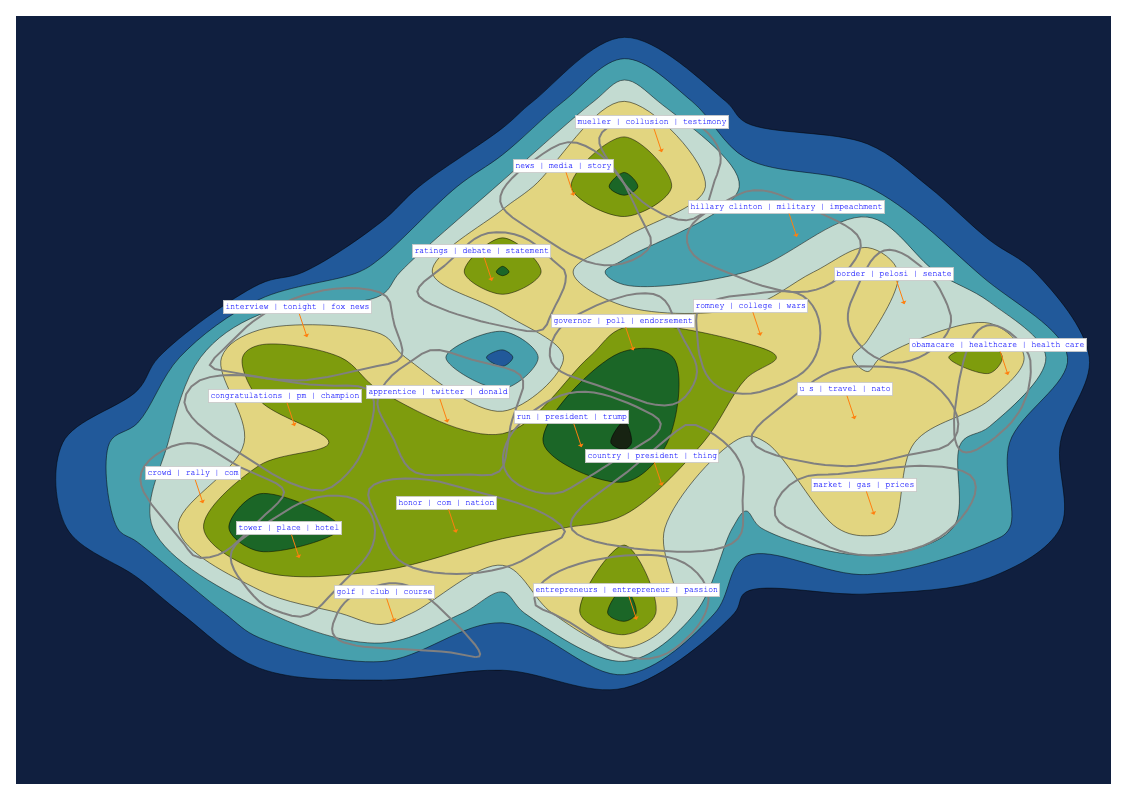

In [5]:

topic_fig = bunka.visualize_topics(width=800, height=800)
topic_fig.show()

Chose a Generative AI Model

In [6]:
from dotenv import load_dotenv

load_dotenv()

from langchain.llms import OpenAI
open_ai_generative_model = OpenAI(openai_api_key = os.getenv('OPEN_AI_KEY'))

"""
from langchain.llms import LlamaCpp
generative_model = LlamaCpp(
    model_path=os.getenv("MODEL_PATH"),
    n_ctx=2048,
    temperature=0.75,
    max_tokens=2000,
    top_p=1,
    verbose=False,
)
generative_model.client.verbose = False

"""

'\nfrom langchain.llms import LlamaCpp\ngenerative_model = LlamaCpp(\n    model_path=os.getenv("MODEL_PATH"),\n    n_ctx=2048,\n    temperature=0.75,\n    max_tokens=2000,\n    top_p=1,\n    verbose=False,\n)\ngenerative_model.client.verbose = False\n\n'

In [7]:
# Topic Modeling Clean
df_topics = bunka.get_clean_topic_name(generative_model=open_ai_generative_model)
topic_fig_clean = bunka.visualize_topics(width=800, height=800)
#topic_fig_clean.show()

Creating new labels for clusters: 100%|████████████████| 20/20 [00:09<00:00,  2.08it/s]


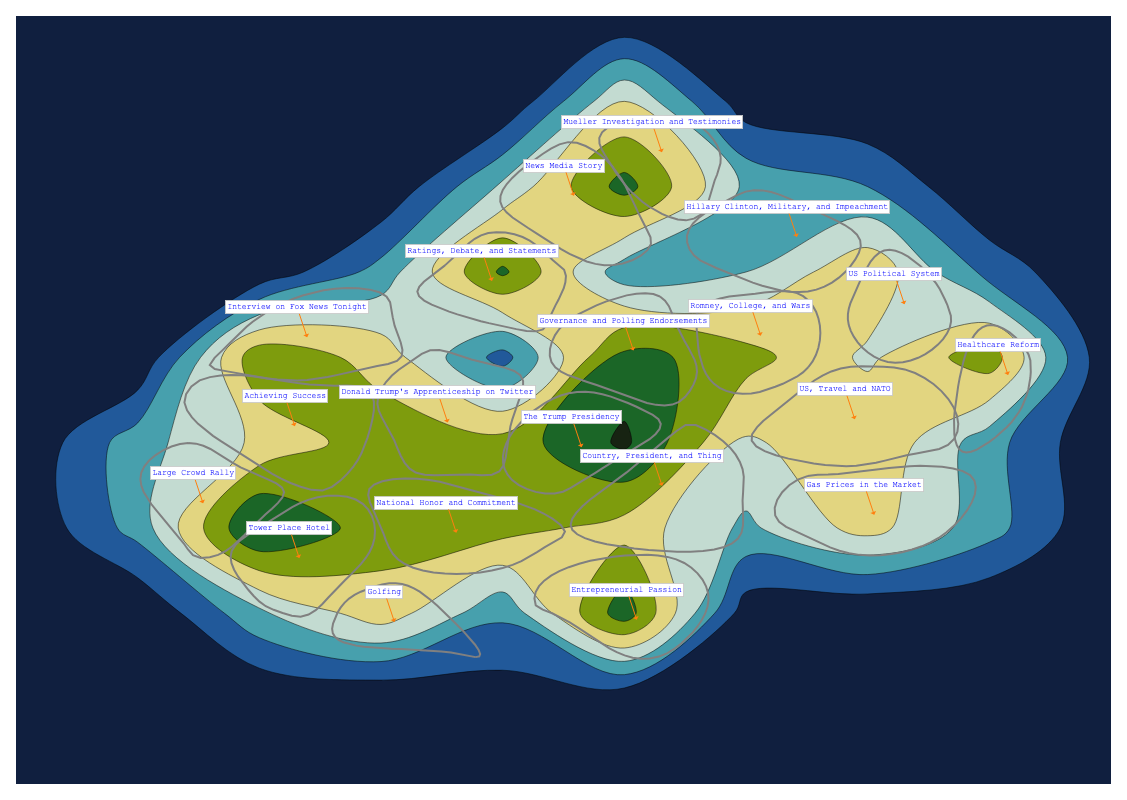

In [8]:
topic_fig_clean

## Open the front-end

In [9]:
bunka.start_server()

Server on port 3000 is already running. Killing it...
NPM server started.



> bunka-web@0.1.0 start
> react-scripts  --openssl-legacy-provider start



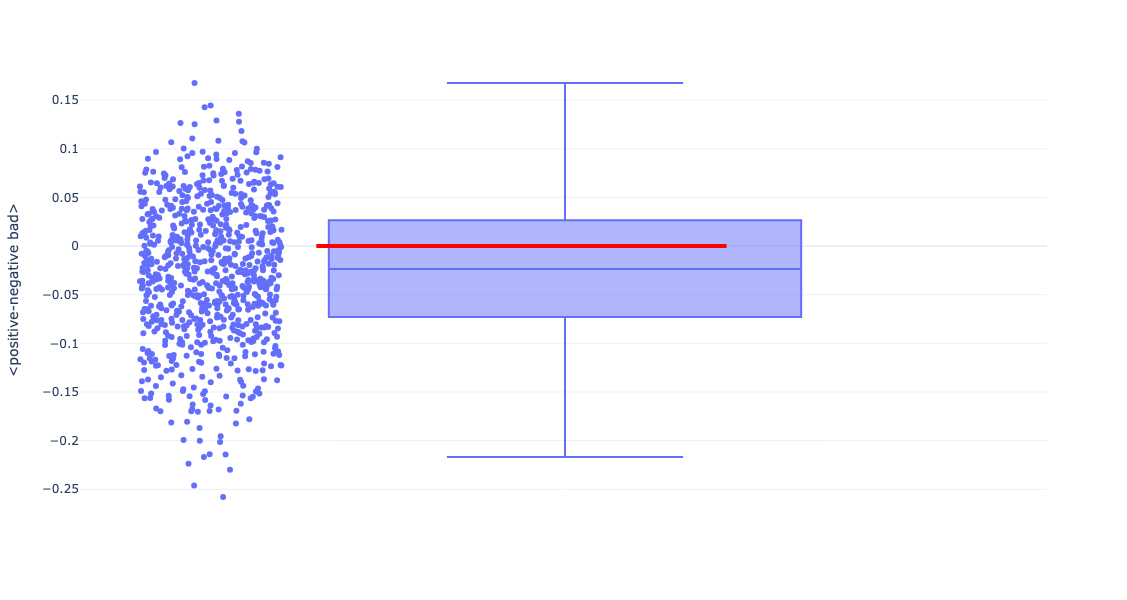

In [10]:
fig_solo = bunka.visualize_bourdieu_one_dimension(
    left=["negative", "bad"],
    right=["positive"],
    width=600,
    height=600,
    explainer=False,
)

fig_solo.show()

(node:70967) [DEP_WEBPACK_DEV_SERVER_ON_AFTER_SETUP_MIDDLEWARE] DeprecationWarning: 'onAfterSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:70967) [DEP_WEBPACK_DEV_SERVER_ON_BEFORE_SETUP_MIDDLEWARE] DeprecationWarning: 'onBeforeSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
Creating new labels for clusters:   0%|                          | 0/5 [00:00<?, ?it/s]

Starting the development server...



Creating new labels for clusters:  80%|██████████████▍   | 4/5 [00:01<00:00,  2.56it/s]

Compiled successfully!

You can now view bunka-web in the browser.

  Local:            http://localhost:3000
  On Your Network:  http://192.168.1.80:3000

Note that the development build is not optimized.
To create a production build, use npm run build.

webpack compiled successfully


Creating new labels for clusters: 100%|██████████████████| 5/5 [00:01<00:00,  2.59it/s]


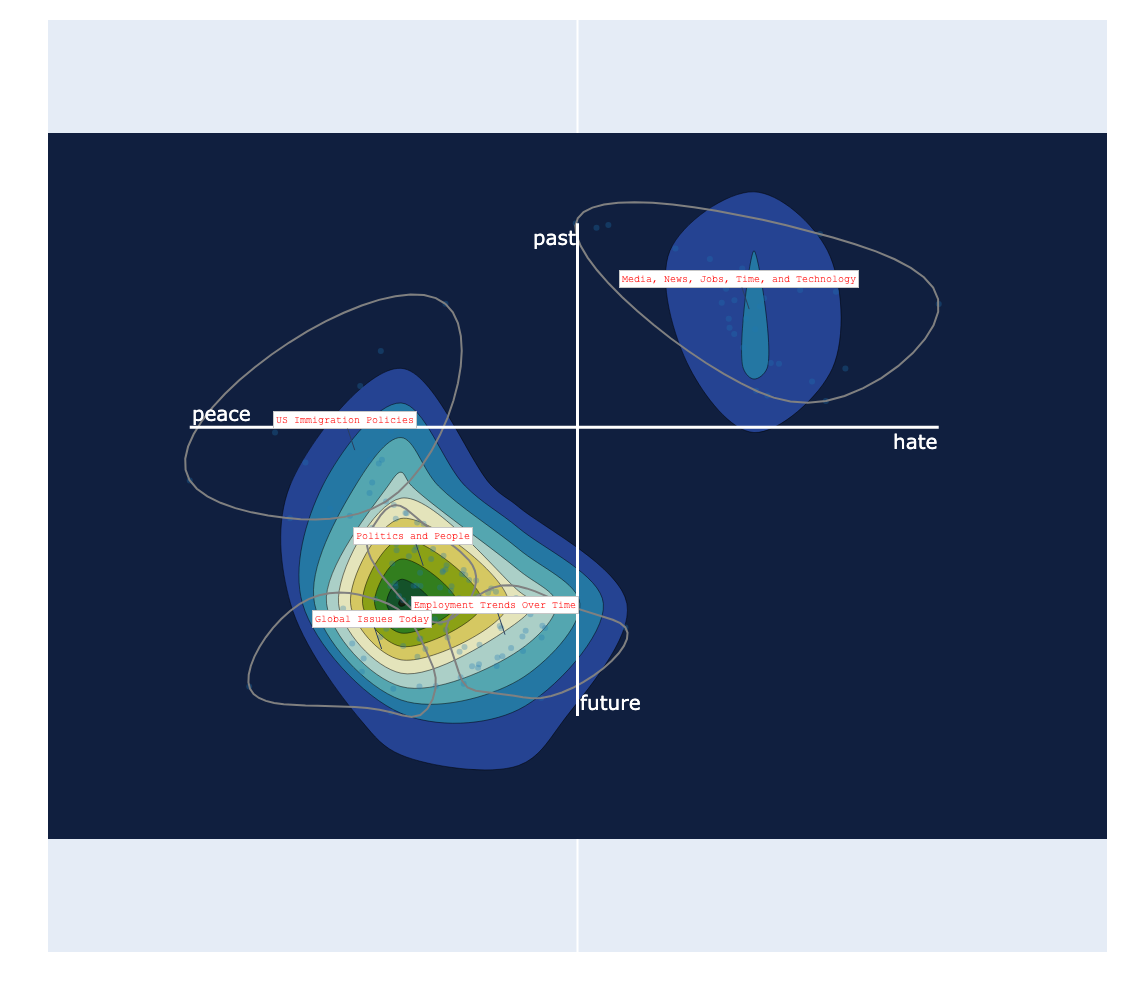

In [11]:
manual_axis_name = {
                    'x_left_name':'hate',
                    'x_right_name':'peace',
                   'y_top_name':'past',
                    'y_bottom_name':'future',
                    }

bourdieu_fig = bunka.visualize_bourdieu(
    generative_model=open_ai_generative_model,
    x_left_words=["this is about about hate"],
    x_right_words=["this is a about peace"],
    y_top_words=["this is about past"],
    y_bottom_words=["this is about future"],
    height=1000,
    width=1000,
    display_percent=False,
    clustering=True,
    topic_n_clusters=5,
    topic_terms=5,
    topic_top_terms_overall=500,
    topic_gen_name=True,
    convex_hull = True,
    radius_size = 0.5,
    manual_axis_name = manual_axis_name
)

bourdieu_fig.show()

In [12]:
bunka.start_server_bourdieu()

Server on port 3000 is already running. Killing it...
NPM server started.


In [13]:
#import plotly
#plotly.offline.plot(bourdieu_fig)

In [14]:
res = bunka.rag_query(query = 'Who is Donald Trump', generative_model = open_ai_generative_model, top_doc = 5)

INFO      |2023-11-19 15:49:03|{}|rag_query|Answering your query, please wait a few seconds



> bunka-web@0.1.0 start
> react-scripts  --openssl-legacy-provider start



In [15]:
print(res['result'])

 Donald Trump is an American businessman and politician who is currently the 45th President of the United States.


In [16]:
for doc in res['source_documents']:
    text = doc.page_content.strip()
    print(text)

donald trump appearing today on cnn international s  connect the world  as  connector of the day   submit questions
donald  you have such a huge heart  love everything trump
donaldtrump is the 21st century ronald reagan  intelligent  bold  surrounded by good people  gets the job done
trump is trump card to success in usa   make him president of usa
via  by       donald trump weighs a 2016 run at


(node:71030) [DEP_WEBPACK_DEV_SERVER_ON_AFTER_SETUP_MIDDLEWARE] DeprecationWarning: 'onAfterSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.
(Use `node --trace-deprecation ...` to show where the warning was created)
(node:71030) [DEP_WEBPACK_DEV_SERVER_ON_BEFORE_SETUP_MIDDLEWARE] DeprecationWarning: 'onBeforeSetupMiddleware' option is deprecated. Please use the 'setupMiddlewares' option.


Starting the development server...

Compiled successfully!

You can now view bunka-web in the browser.

  Local:            http://localhost:3000
  On Your Network:  http://192.168.1.80:3000

Note that the development build is not optimized.
To create a production build, use npm run build.

webpack compiled successfully
